BALANCE INDICATORS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data = pd.read_csv('BalanceOutcomes.csv')
data.head()


,Part,Week,Task,Qual,PS R,PS ML,PS AP
0,10,0,Compliant,EC,3.064781,3.955239,3.884608
1,10,0,Compliant,EO,3.193246,4.038658,3.980261
2,10,0,Firm,EC,3.635722,4.460273,4.124975
3,10,0,Firm,EO,3.560634,4.313638,4.091500
4,10,12,Compliant,EC,3.069993,4.136390,3.863881


In [ ]:
print(list(data));
print("Number of observations in the data set:",data.shape[0]);
data.drop_duplicates() 
print("Number of observations in the data set after dropping duplicates:",data.shape[0]);
print(data.isnull().values.any());
print(data.isnull().sum())
print("Total number of null values:",sum(data.isnull().sum()))

In [ ]:
stats = data.describe().loc[['min', 'max', 'mean']]
print(stats)

In [ ]:
Task = data['Task'].unique()
Qual = data['Qual'].unique()
Week = data['Week'].unique()

print("Unique Task:", Task)
print("Unique Qual:", Qual)
print("Unique Week:", Week)

In [ ]:
num_unique_parts = data['Part'].nunique()
print(num_unique_parts)

In [ ]:


# Assuming df is your DataFrame
columns_to_plot = ['PS R', 'PS ML', 'PS AP']

# Set figure size dynamically based on the number of columns
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))  # 1 row, N columns

# Loop through each column and plot the histogram
for i, col in enumerate(columns_to_plot):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data[columns_to_plot].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Gait Parameters")
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/PPT/CORRELATIONBALANCE.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data to long format
sway_data = data[['PS R']].melt(var_name='Sway Type', value_name='Value')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sway Type', y='Value', data=sway_data, palette='Set2')

# Titles and labels
plt.title('PS R')
plt.xlabel('Sway Direction')
plt.ylabel('Sway Value')

plt.tight_layout()
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/PSRBOX.png', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
# Reshape to long format
sway_data = data.melt(id_vars='Week', value_vars=['PS R'],
                      var_name='Sway Type', value_name='Value')

plt.figure(figsize=(10, 6))

sns.boxplot(data=sway_data, x='Week', y='Value', hue='Sway Type', palette='Set2')

plt.title('Postural Sway Metrics across Weeks')
plt.xlabel('Week')
plt.ylabel('Sway Value')

plt.legend(title='Sway Type')
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('Q("PS R") ~ C(Week) + C(Qual) + C(Task)', data=data).fit()

# Run ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


In [5]:
df_sub = pd.read_csv('SUB_WEEKLY_FINAL_1.csv')
df_sub.head()

,ID,GROUP,ENROLMENTDATE,INITIALCAREPLAN,TIME_SESSION1,TIME/SESSION1_APEXPOSTSX,TIME/SESSION1_BASEPOSTERIORSX,TIME/SESSION1_BASEPOSTSX,TIME/SESSION1_C0BILAT,TIME/SESSION1_C0PS,...,WEEK16_AVERAGE,WEEK17_AVERAGE,WEEK18_AVERAGE,WEEK19_AVERAGE,WEEK20_AVERAGE,FIRST,MID,LAST,SLOPE1,SLOPE2
0,1,Active,20-Apr,3x4,20-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,23.00,17.67,12.67,-0.6043,-1.8849
1,2,Active,20-Apr,3x4,20-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,21.00,10.67,16.00,-1.6900,0.3214
2,3,Passive,23-Apr,2x6,23-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,19.50,27.00,22.00,1.4054,-0.8000
3,4,Active,19-Apr,3x4,19-04-2022,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,18.67,16.00,12.00,-0.7641,-4.0000
4,5,Active,21-Apr,3x4,21-04-2022,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,20.50,19.00,11.00,-0.4909,-0.4527


In [6]:
data.rename(columns={'Part': 'ID'}, inplace=True)

In [7]:

# Select only the required columns from df_info
cols_to_merge = ['ID', 'GROUP', 'AGE', 'FIRST', 'MID', 'LAST','SLOPE1','SLOPE2']
df_info_subset = df_sub[cols_to_merge]

# Merge the dataframes on 'ID'
df_merged = pd.merge(data, df_info_subset, on='ID', how='left')

In [8]:
df_merged.head()

,ID,Week,Task,Qual,PS R,PS ML,PS AP,GROUP,AGE,FIRST,MID,LAST,SLOPE1,SLOPE2
0,10,0,Compliant,EC,3.064781,3.955239,3.884608,Passive,A,23.5,33.0,34.0,2.6622,1.7079
1,10,0,Compliant,EO,3.193246,4.038658,3.980261,Passive,A,23.5,33.0,34.0,2.6622,1.7079
2,10,0,Firm,EC,3.635722,4.460273,4.124975,Passive,A,23.5,33.0,34.0,2.6622,1.7079
3,10,0,Firm,EO,3.560634,4.313638,4.091500,Passive,A,23.5,33.0,34.0,2.6622,1.7079
4,10,12,Compliant,EC,3.069993,4.136390,3.863881,Passive,A,23.5,33.0,34.0,2.6622,1.7079


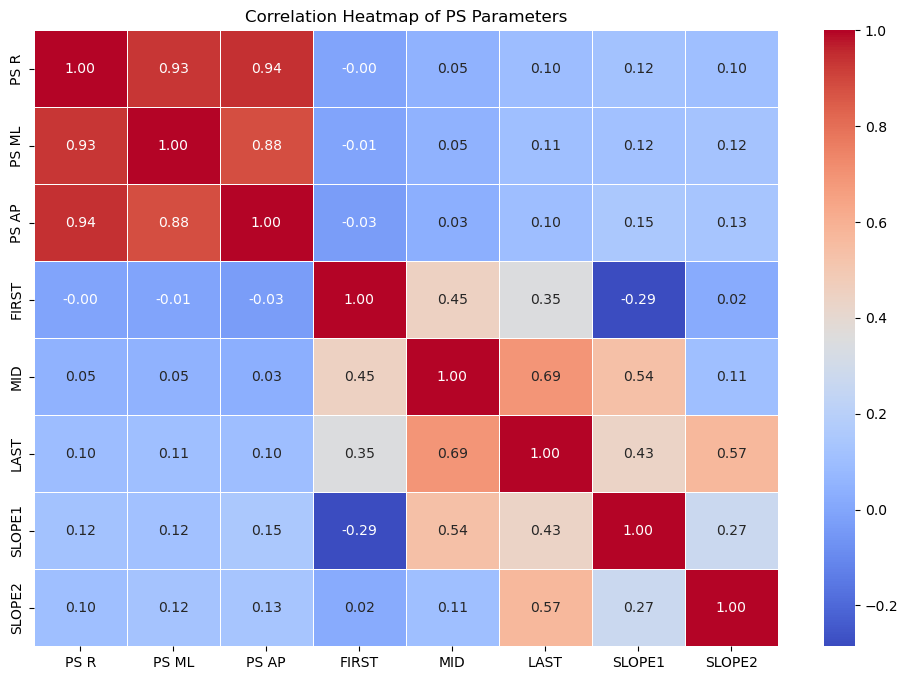

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['PS R', 'PS ML', 'PS AP','FIRST', 'MID', 'LAST','SLOPE1','SLOPE2']

# Compute the correlation matrix
corr_matrix = df_merged[columns_to_plot].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of PS Parameters")
plt.show()

In [11]:
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_gam = df_merged.copy()

# Encode categorical variables
for col in ['GROUP', 'Task', 'Qual']:
    le = LabelEncoder()
    df_gam[col] = le.fit_transform(df_gam[col].astype(str))

# Drop rows with missing values in relevant columns
df_gam = df_gam.dropna(subset=['PS R','FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual'])

# Define features and response
X = df_gam[['FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual']]
y = df_gam['PS R']

# Fit the GAM model
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + f(5) + f(6) + f(7) 
).fit(X, y)

# Print the summary
print("\n✅ Generalized Additive Model (GAM) Summary:")
gam.summary()



✅ Generalized Additive Model (GAM) Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     66.1294
Link Function:                     IdentityLink Log Likelihood:                                -10023.3113
Number of Samples:                         2598 AIC:                                            20180.8814
                                                AICc:                                            20184.497
                                                GCV:                                                0.0958
                                                Scale:                                              0.0914
                                                Pseudo R-Squared:                                  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33228\4029504209.py:26: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


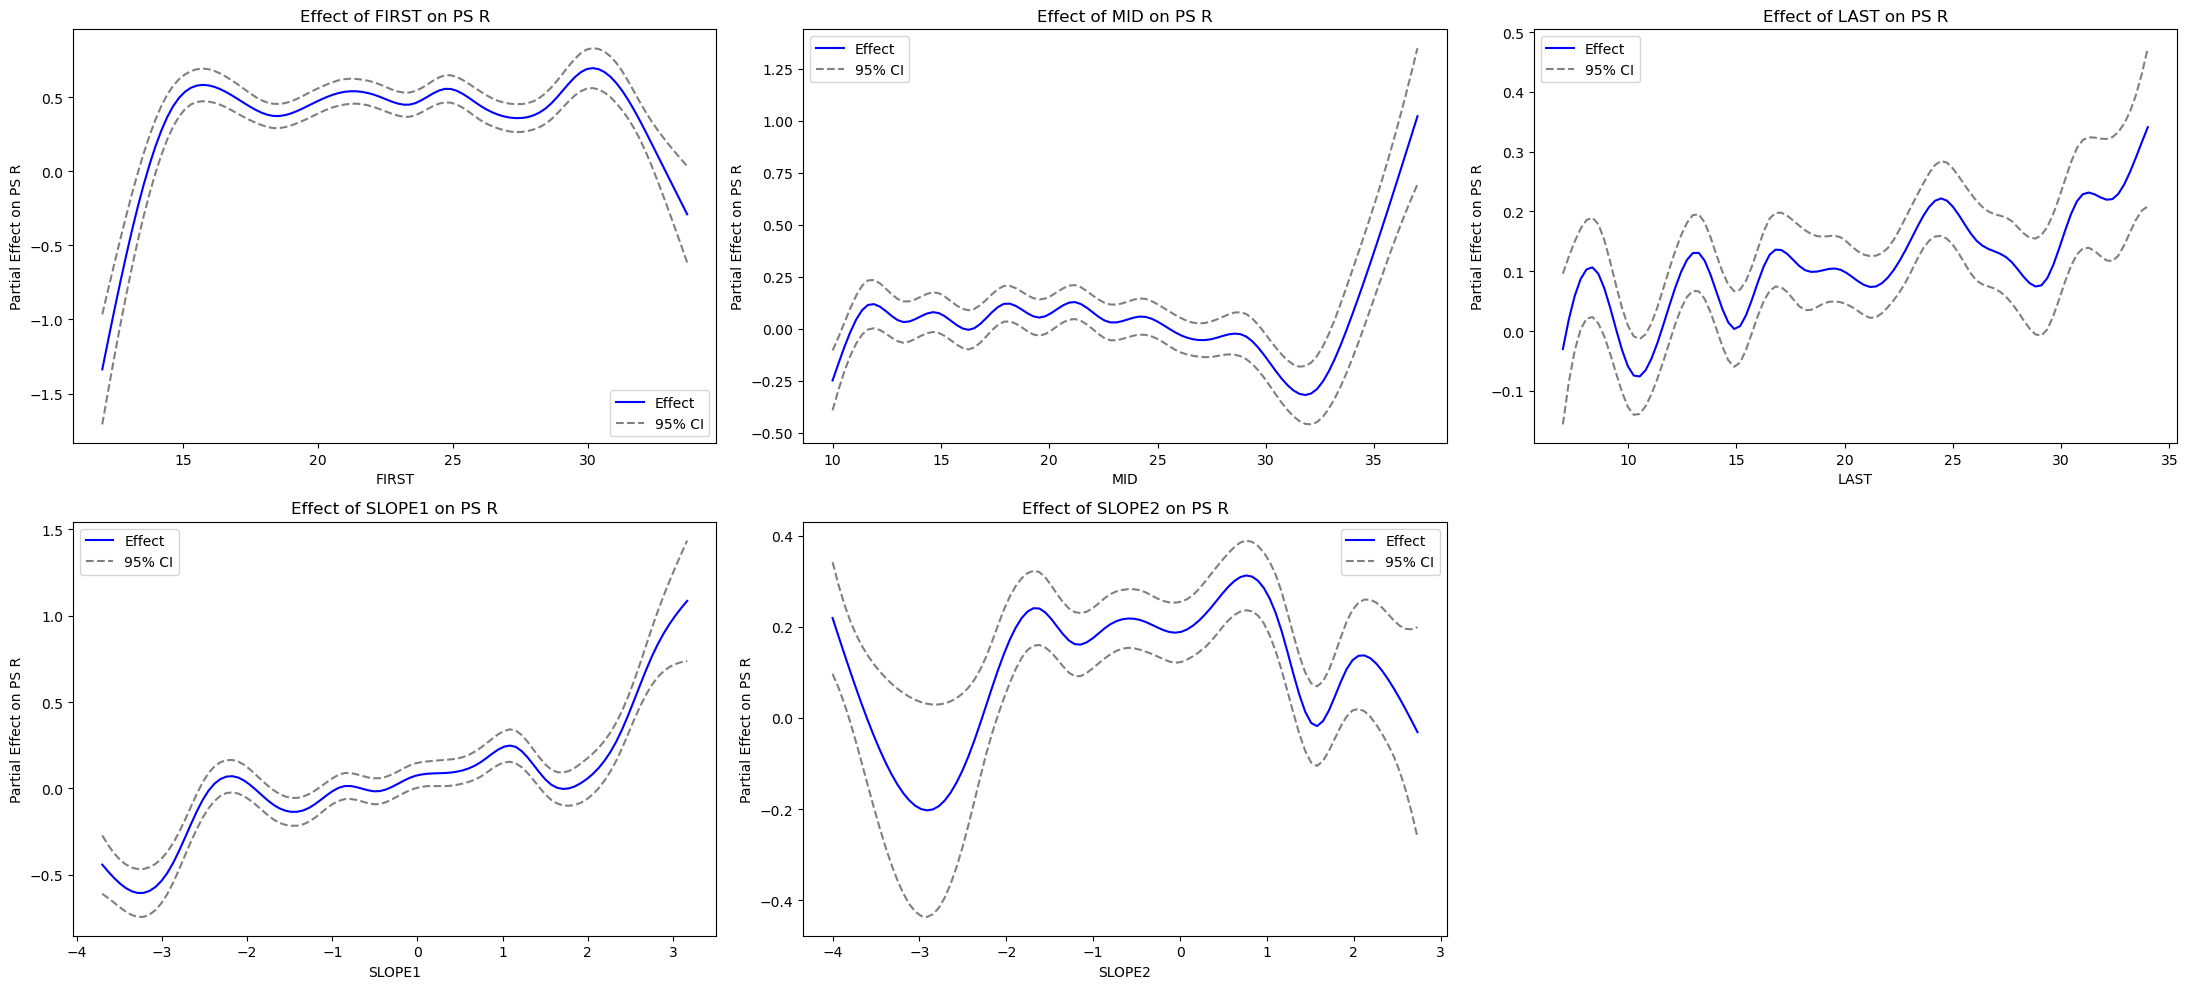

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot area: 2 rows, 3 columns
fig, axs = plt.subplots(2, 3, figsize=(22, 10))  # Bigger plot

titles = ['Effect of FIRST on PS R', 'Effect of MID on PS R', 'Effect of LAST on PS R',
          'Effect of SLOPE1 on PS R', 'Effect of SLOPE2 on PS R']

# Flatten axes array for easier iteration
axs = axs.flatten()

# Plot smooth terms
for i in range(5):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    axs[i].plot(XX[:, i], pdep, color='blue', label='Effect')
    axs[i].plot(XX[:, i], confi[:, 0], linestyle='--', color='gray', label='95% CI')
    axs[i].plot(XX[:, i], confi[:, 1], linestyle='--', color='gray')

    axs[i].set_title(titles[i])
    axs[i].set_xlabel(titles[i].split(' ')[2])
    axs[i].set_ylabel('Partial Effect on PS R')
    axs[i].legend()

# Hide the unused 6th subplot
axs[5].axis('off')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on training data
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + f(5) + f(6) + f(7)
).fit(X_train, y_train)

# Predict on test data
y_pred = gam.predict(X_test)

# Validation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n🔍 Model Validation Metrics:")
print(f"✅ RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")



🔍 Model Validation Metrics:
✅ RMSE (Root Mean Squared Error): 0.299
✅ R² Score: 0.580


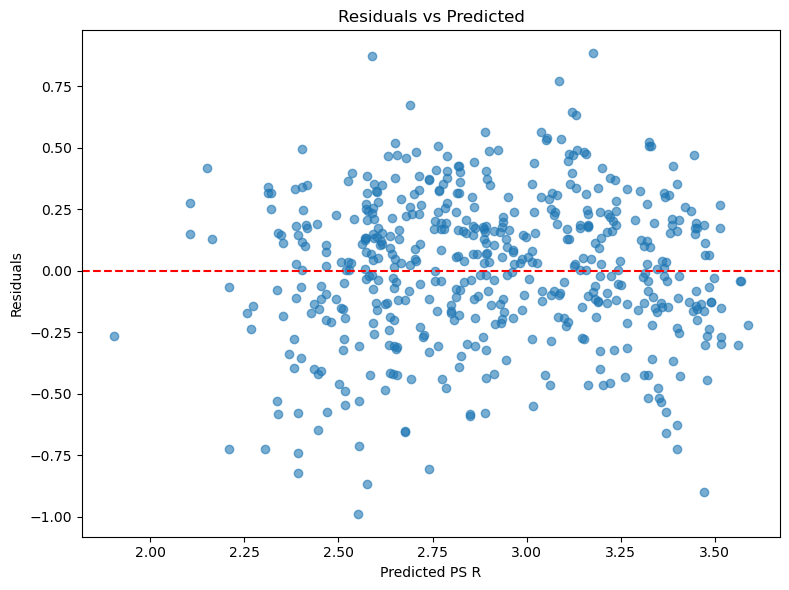

In [15]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted PS R')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


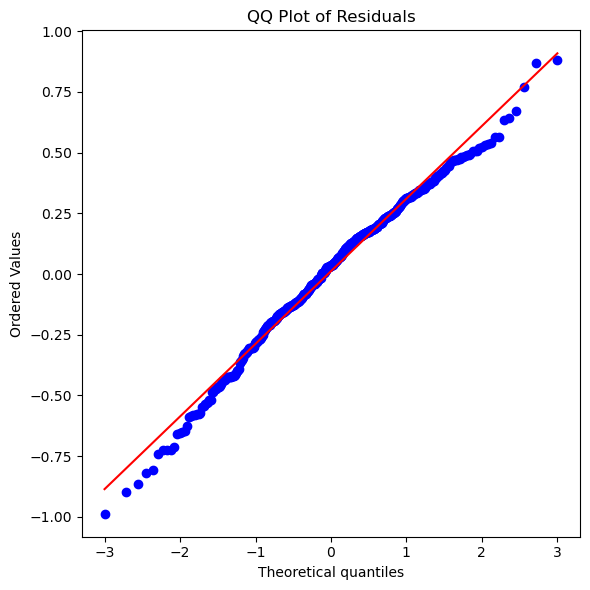

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()


GAIT INDICATORS

In [17]:
data = pd.read_csv('GaitOutcomes.csv')
data.head()
print(list(data))

['Part', 'Week', 'Task', 'Qual', 'Gait symmetry', 'Step length', 'Step length left', 'Step length right', 'Step time', 'Step time left', 'Step time right', 'Step length var', 'Step time var', 'Step length asym', 'Step time asym', 'Step velocity', 'Step count lap 1', 'Step count lap 2', 'Step count lap 3', 'Step count lap 4']


In [18]:
print(list(data));
print("Number of observations in the data set:",data.shape[0]);
data.drop_duplicates() 
print("Number of observations in the data set after dropping duplicates:",data.shape[0]);
print(data.isnull().values.any());
print(data.isnull().sum())
print("Total number of null values:",sum(data.isnull().sum()))

['Part', 'Week', 'Task', 'Qual', 'Gait symmetry', 'Step length', 'Step length left', 'Step length right', 'Step time', 'Step time left', 'Step time right', 'Step length var', 'Step time var', 'Step length asym', 'Step time asym', 'Step velocity', 'Step count lap 1', 'Step count lap 2', 'Step count lap 3', 'Step count lap 4']
Number of observations in the data set: 1379
Number of observations in the data set after dropping duplicates: 1379
False
Part                 0
Week                 0
Task                 0
Qual                 0
Gait symmetry        0
Step length          0
Step length left     0
Step length right    0
Step time            0
Step time left       0
Step time right      0
Step length var      0
Step time var        0
Step length asym     0
Step time asym       0
Step velocity        0
Step count lap 1     0
Step count lap 2     0
Step count lap 3     0
Step count lap 4     0
dtype: int64
Total number of null values: 0


In [19]:
stats = data.describe().loc[['min', 'max', 'mean']]
print(stats)

            Part       Week  Gait symmetry  Step length  Step length left  \
min     1.000000   0.000000      30.206380     0.282213          0.288865   
max   251.000000  16.000000      73.883265     0.806550          0.809685   
mean  128.427121   7.930384      61.169890     0.562806          0.568470   

      Step length right  Step time  Step time left  Step time right  \
min            0.274959   0.410000        0.410000         0.385000   
max            0.796509   0.945000        0.970000         0.935000   
mean           0.556325   0.604489        0.612451         0.594732   

      Step length var  Step time var  Step length asym  Step time asym  \
min          1.356994       1.255493          0.002015        0.000000   
max         39.653141      47.751617         29.764131       48.062016   
mean         5.989996       5.779378          5.277611        5.649981   

      Step velocity  Step count lap 1  Step count lap 2  Step count lap 3  \
min        0.457670          3.0

In [20]:
Task = data['Task'].unique()
Qual = data['Qual'].unique()
Week = data['Week'].unique()

print("Unique Task:", Task)
print("Unique Qual:", Qual)
print("Unique Week:", Week)


Unique Task: ['Walk']
Unique Qual: ['HF' 'HT']
Unique Week: [ 0 12 16  6]


In [21]:
num_unique_parts = data['Part'].nunique()
print(num_unique_parts)

187


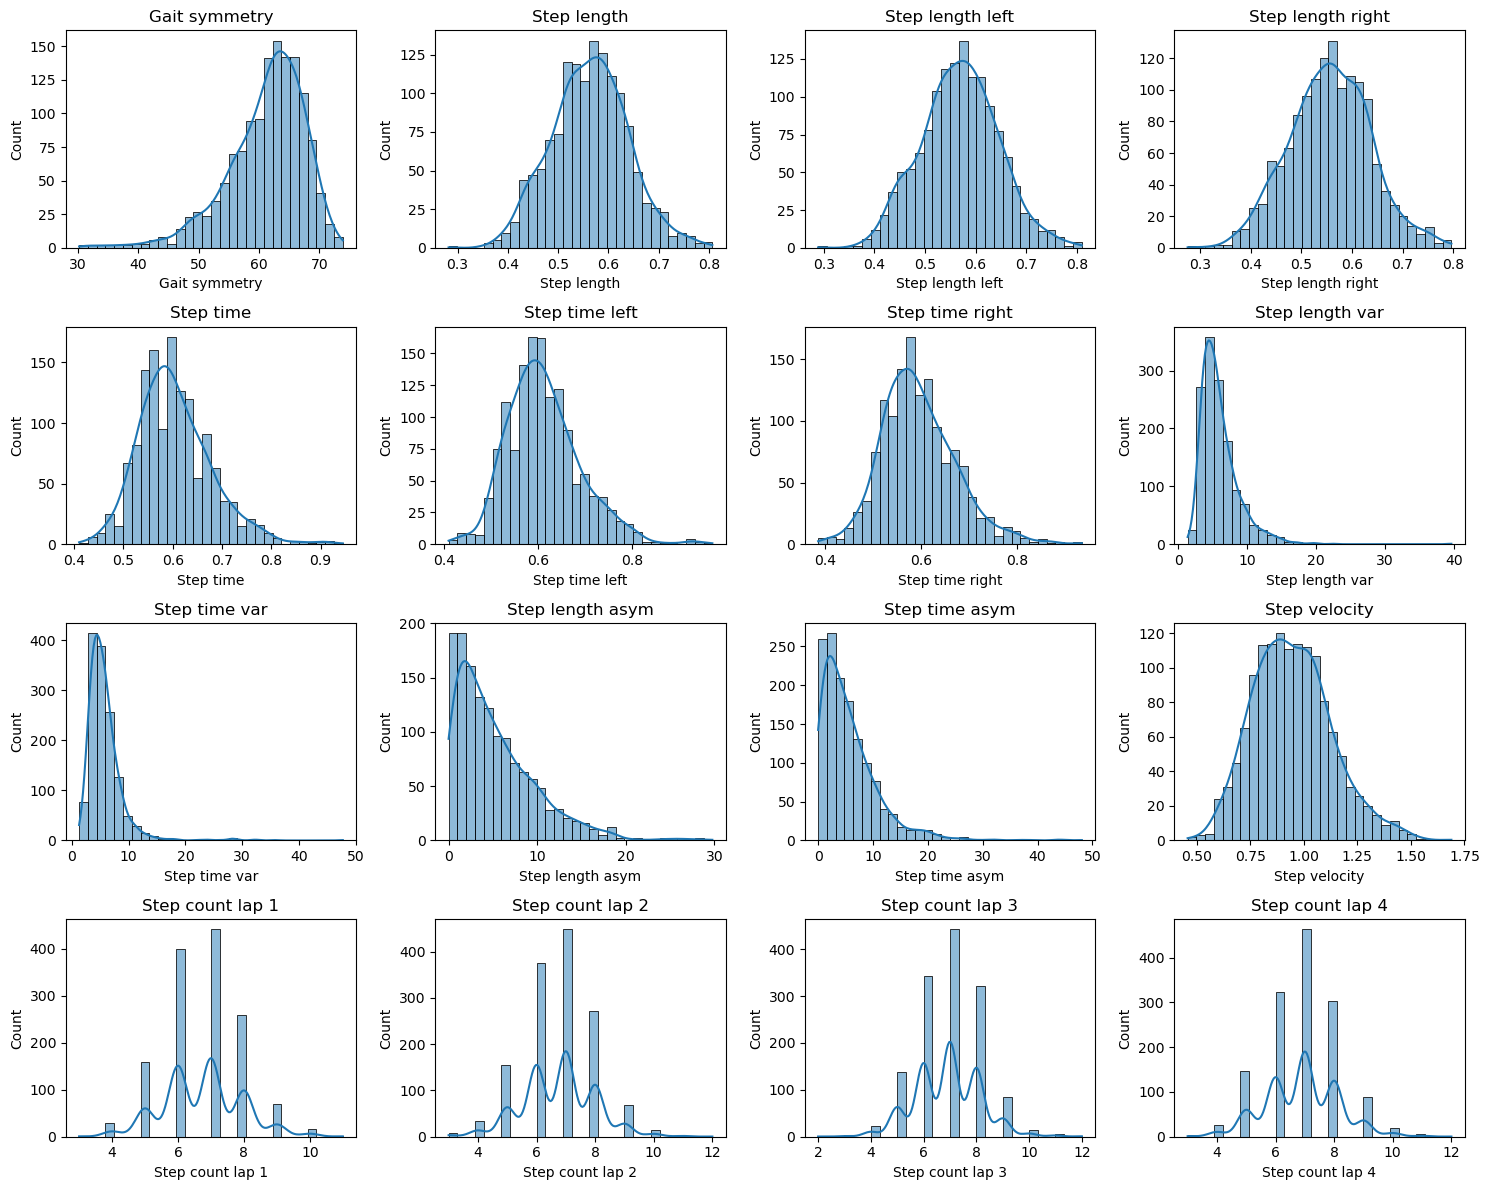

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
columns_to_plot = ['Gait symmetry', 'Step length', 'Step length left', 'Step length right',
                   'Step time', 'Step time left', 'Step time right', 'Step length var',
                   'Step time var', 'Step length asym', 'Step time asym', 'Step velocity',
                   'Step count lap 1', 'Step count lap 2', 'Step count lap 3', 'Step count lap 4']

# Set figure size
plt.figure(figsize=(15, 12))

# Create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on number of plots
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


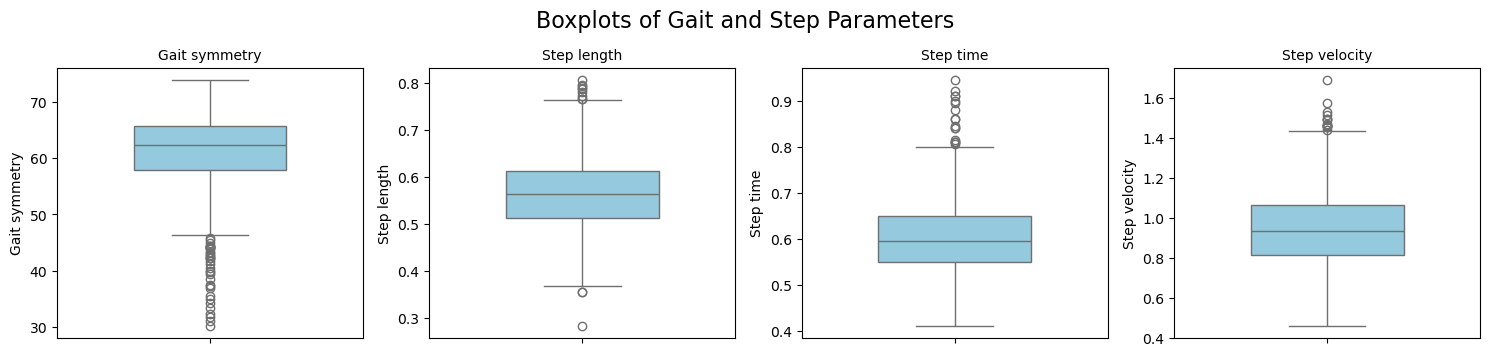

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = ['Gait symmetry', 'Step length',
                   'Step time', 'Step velocity',
                   ]

# Set figure size
plt.figure(figsize=(15, 12))

# Loop through columns to create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col], color="skyblue", width=0.5)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

# Title
plt.suptitle("Boxplots of Gait and Step Parameters", fontsize=16, y=1.02)



#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/GAITBOXPLOTS.png', dpi=300, bbox_inches='tight')
plt.show()


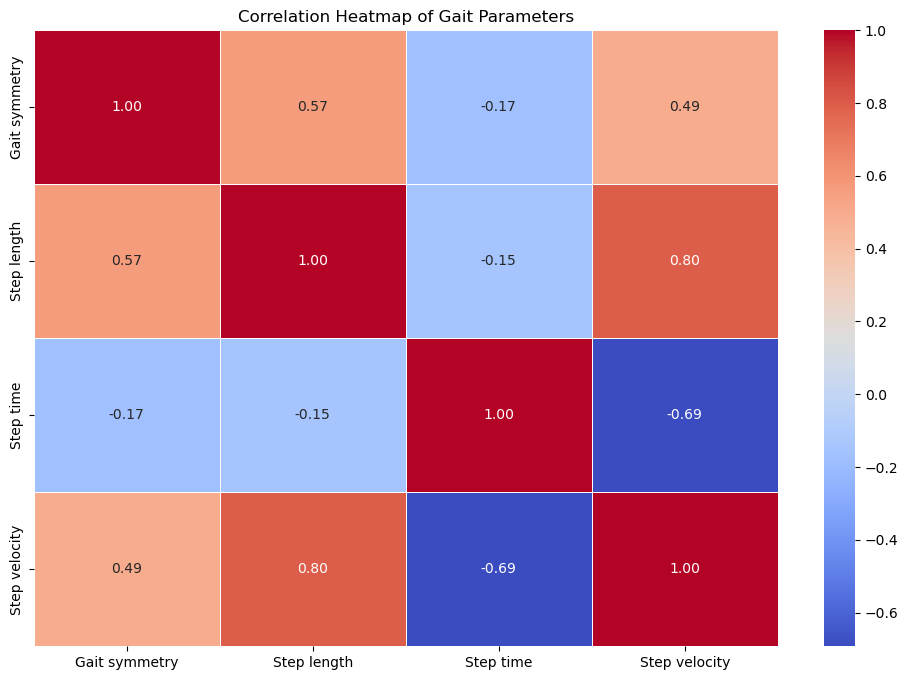

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data[columns_to_plot].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Gait Parameters")
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/GAITCORR.png', dpi=300, bbox_inches='tight')
plt.show()



In [27]:
data.rename(columns={'Part': 'ID'}, inplace=True)

In [28]:

# Select only the required columns from df_info
cols_to_merge = ['ID', 'GROUP', 'AGE', 'FIRST', 'MID', 'LAST','SLOPE1','SLOPE2']
df_info_subset = df_sub[cols_to_merge]

# Merge the dataframes on 'ID'
df_merged = pd.merge(data, df_info_subset, on='ID', how='left')

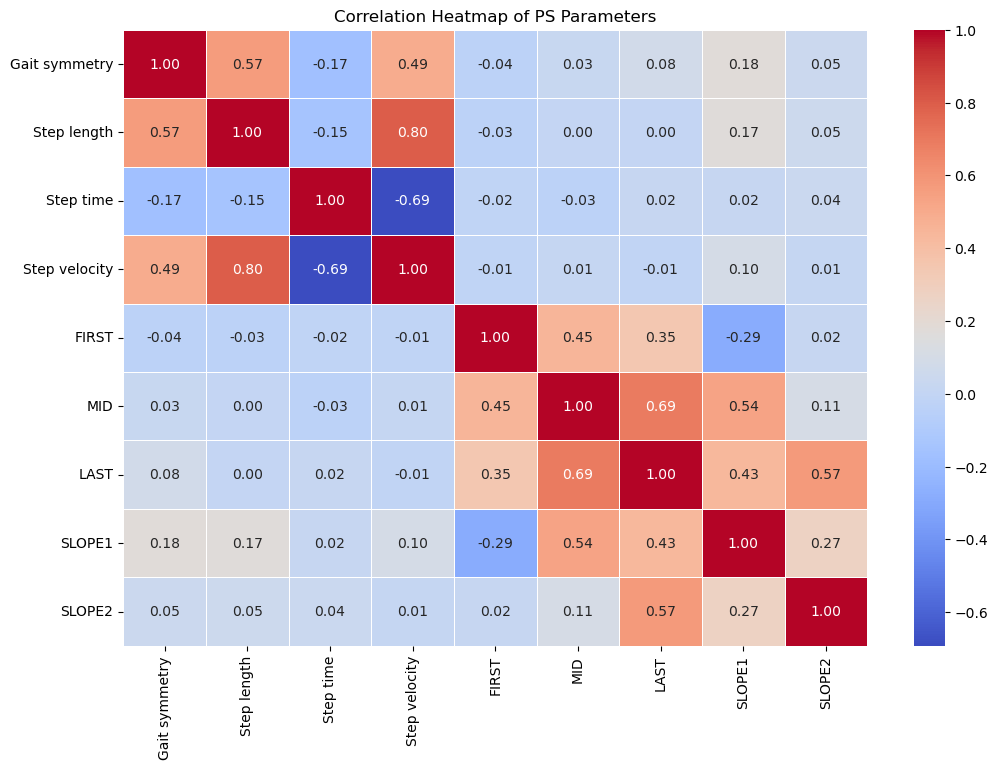

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Gait symmetry', 'Step length',
                   'Step time', 'Step velocity','FIRST', 'MID', 'LAST','SLOPE1','SLOPE2']

# Compute the correlation matrix
corr_matrix = df_merged[columns_to_plot].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of PS Parameters")
plt.show()

GAIT SYMMETRY GAMS

In [30]:
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_gam = df_merged.copy()

# Encode categorical variables
for col in ['GROUP', 'Task', 'Qual']:
    le = LabelEncoder()
    df_gam[col] = le.fit_transform(df_gam[col].astype(str))

# Drop rows with missing values in relevant columns
df_gam = df_gam.dropna(subset=['Gait symmetry','FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual'])

# Define features and response
X = df_gam[['FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual']]
y = df_gam['Gait symmetry']

# Fit the GAM model
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + f(5) + f(6) + f(7) 
).fit(X, y)

# Print the summary
print("\n✅ Generalized Additive Model (GAM) Summary:")
gam.summary()



✅ Generalized Additive Model (GAM) Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      60.277
Link Function:                     IdentityLink Log Likelihood:                                 -5753.8774
Number of Samples:                         1297 AIC:                                            11630.3088
                                                AICc:                                           11636.4902
                                                GCV:                                                36.233
                                                Scale:                                             33.2151
                                                Pseudo R-Squared:                                  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33228\1367289505.py:26: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


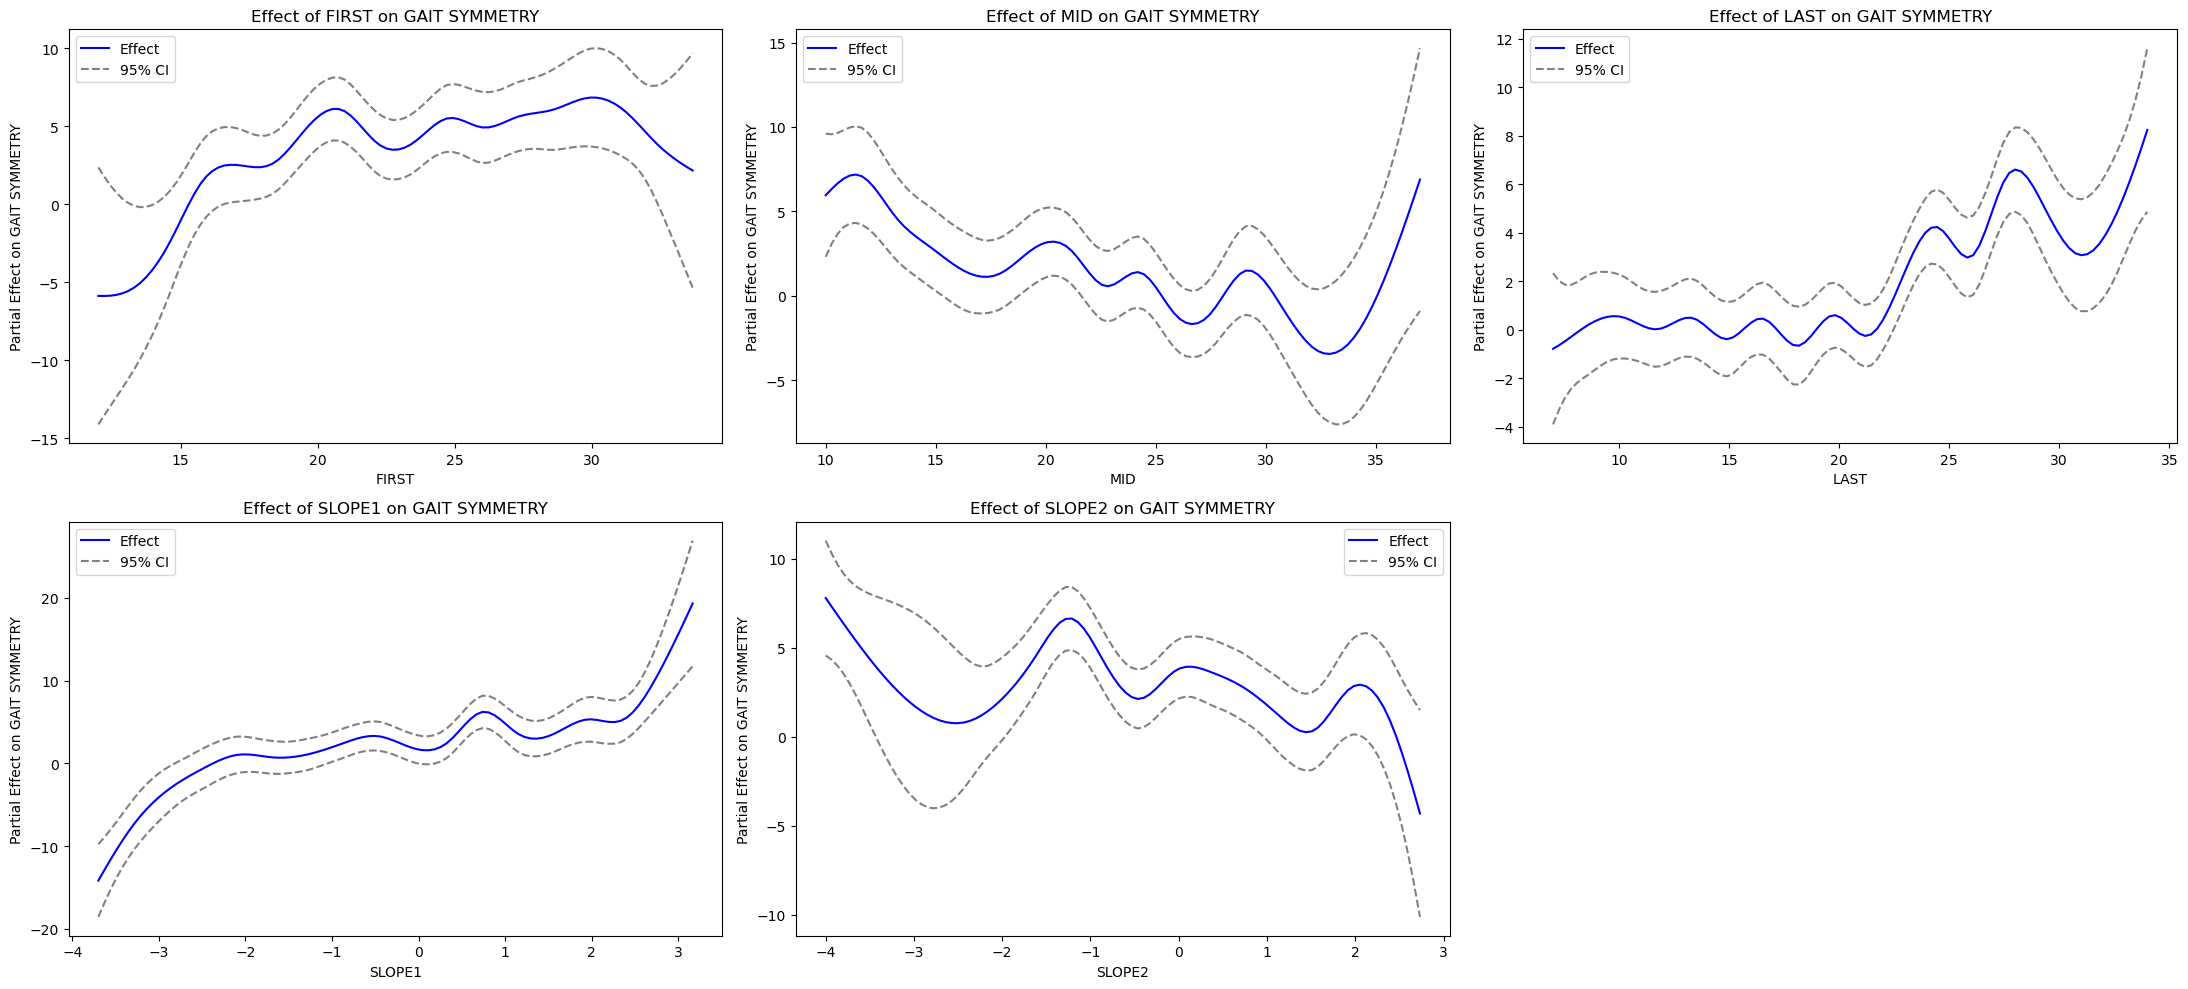

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot area: 2 rows, 3 columns
fig, axs = plt.subplots(2, 3, figsize=(22, 10))  # Bigger plot

titles = ['Effect of FIRST on GAIT SYMMETRY', 'Effect of MID on GAIT SYMMETRY', 'Effect of LAST on GAIT SYMMETRY',
          'Effect of SLOPE1 on GAIT SYMMETRY', 'Effect of SLOPE2 on GAIT SYMMETRY']

# Flatten axes array for easier iteration
axs = axs.flatten()

# Plot smooth terms
for i in range(5):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    axs[i].plot(XX[:, i], pdep, color='blue', label='Effect')
    axs[i].plot(XX[:, i], confi[:, 0], linestyle='--', color='gray', label='95% CI')
    axs[i].plot(XX[:, i], confi[:, 1], linestyle='--', color='gray')

    axs[i].set_title(titles[i])
    axs[i].set_xlabel(titles[i].split(' ')[2])
    axs[i].set_ylabel('Partial Effect on GAIT SYMMETRY')
    axs[i].legend()

# Hide the unused 6th subplot
axs[5].axis('off')

plt.tight_layout()
plt.show()


STEP LENGTH GAMS

In [32]:
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_gam = df_merged.copy()

# Encode categorical variables
for col in ['GROUP', 'Task', 'Qual']:
    le = LabelEncoder()
    df_gam[col] = le.fit_transform(df_gam[col].astype(str))

# Drop rows with missing values in relevant columns
df_gam = df_gam.dropna(subset=['Step length','FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual'])

# Define features and response
X = df_gam[['FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual']]
y = df_gam['Step length']

# Fit the GAM model
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + f(5) + f(6) + f(7) 
).fit(X, y)

# Print the summary
print("\n✅ Generalized Additive Model (GAM) Summary:")
gam.summary()



✅ Generalized Additive Model (GAM) Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      60.277
Link Function:                     IdentityLink Log Likelihood:                               -142391.2407
Number of Samples:                         1297 AIC:                                           284905.0355
                                                AICc:                                          284911.2169
                                                GCV:                                                0.0045
                                                Scale:                                              0.0042
                                                Pseudo R-Squared:                                  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33228\865978413.py:26: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


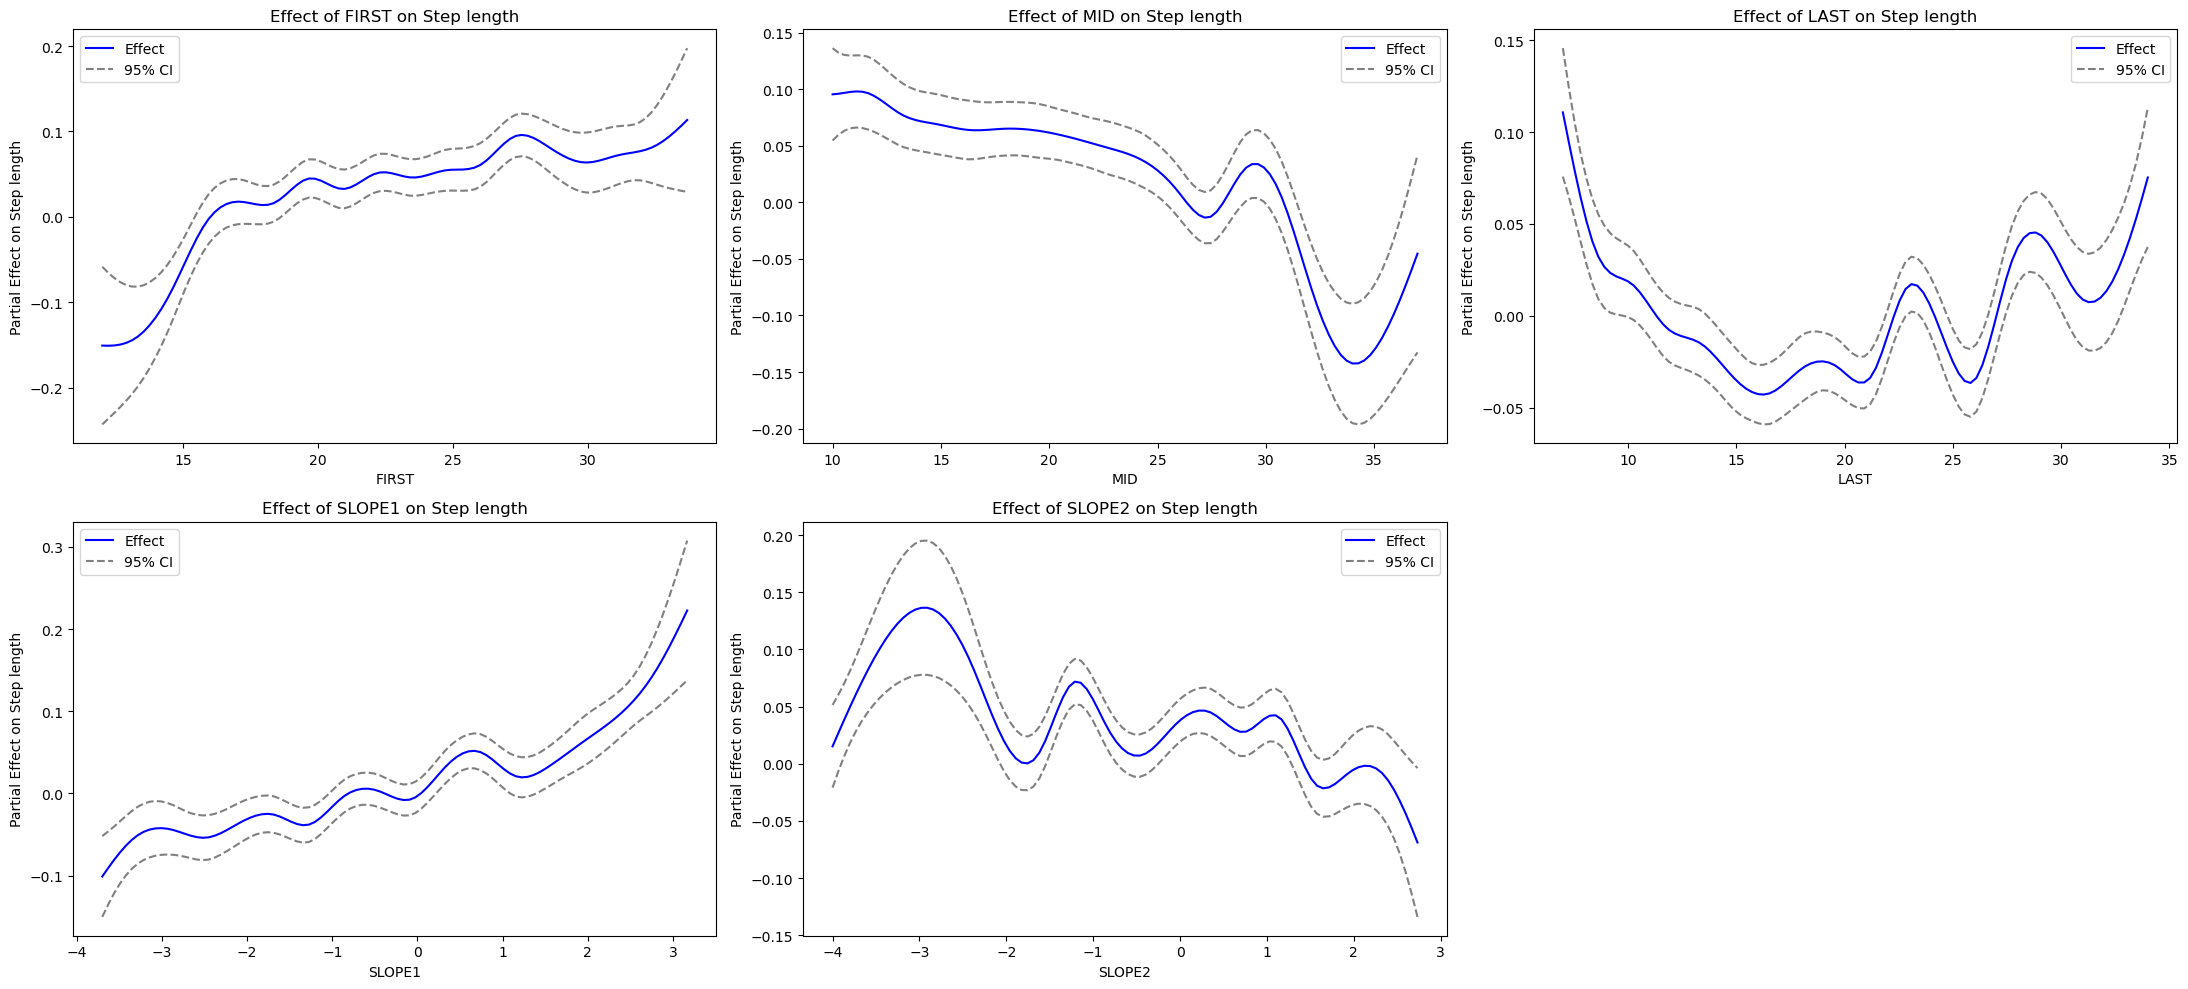

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot area: 2 rows, 3 columns
fig, axs = plt.subplots(2, 3, figsize=(22, 10))  # Bigger plot

titles = ['Effect of FIRST on Step length', 'Effect of MID on Step length', 'Effect of LAST on Step length',
          'Effect of SLOPE1 on Step length', 'Effect of SLOPE2 on Step length']

# Flatten axes array for easier iteration
axs = axs.flatten()

# Plot smooth terms
for i in range(5):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    axs[i].plot(XX[:, i], pdep, color='blue', label='Effect')
    axs[i].plot(XX[:, i], confi[:, 0], linestyle='--', color='gray', label='95% CI')
    axs[i].plot(XX[:, i], confi[:, 1], linestyle='--', color='gray')

    axs[i].set_title(titles[i])
    axs[i].set_xlabel(titles[i].split(' ')[2])
    axs[i].set_ylabel('Partial Effect on Step length')
    axs[i].legend()

# Hide the unused 6th subplot
axs[5].axis('off')

plt.tight_layout()
plt.show()


STEP VELOCITY GAMS

In [34]:
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_gam = df_merged.copy()

# Encode categorical variables
for col in ['GROUP', 'Task', 'Qual']:
    le = LabelEncoder()
    df_gam[col] = le.fit_transform(df_gam[col].astype(str))

# Drop rows with missing values in relevant columns
df_gam = df_gam.dropna(subset=['Step velocity','FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual'])

# Define features and response
X = df_gam[['FIRST', 'MID', 'LAST','SLOPE1','SLOPE2', 'GROUP', 'Task', 'Qual']]
y = df_gam['Step velocity']

# Fit the GAM model
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + f(5) + f(6) + f(7) 
).fit(X, y)

# Print the summary
print("\n✅ Generalized Additive Model (GAM) Summary:")
gam.summary()



✅ Generalized Additive Model (GAM) Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      60.277
Link Function:                     IdentityLink Log Likelihood:                                -20865.1225
Number of Samples:                         1297 AIC:                                             41852.799
                                                AICc:                                           41858.9804
                                                GCV:                                                0.0276
                                                Scale:                                              0.0253
                                                Pseudo R-Squared:                                  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33228\949599418.py:26: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


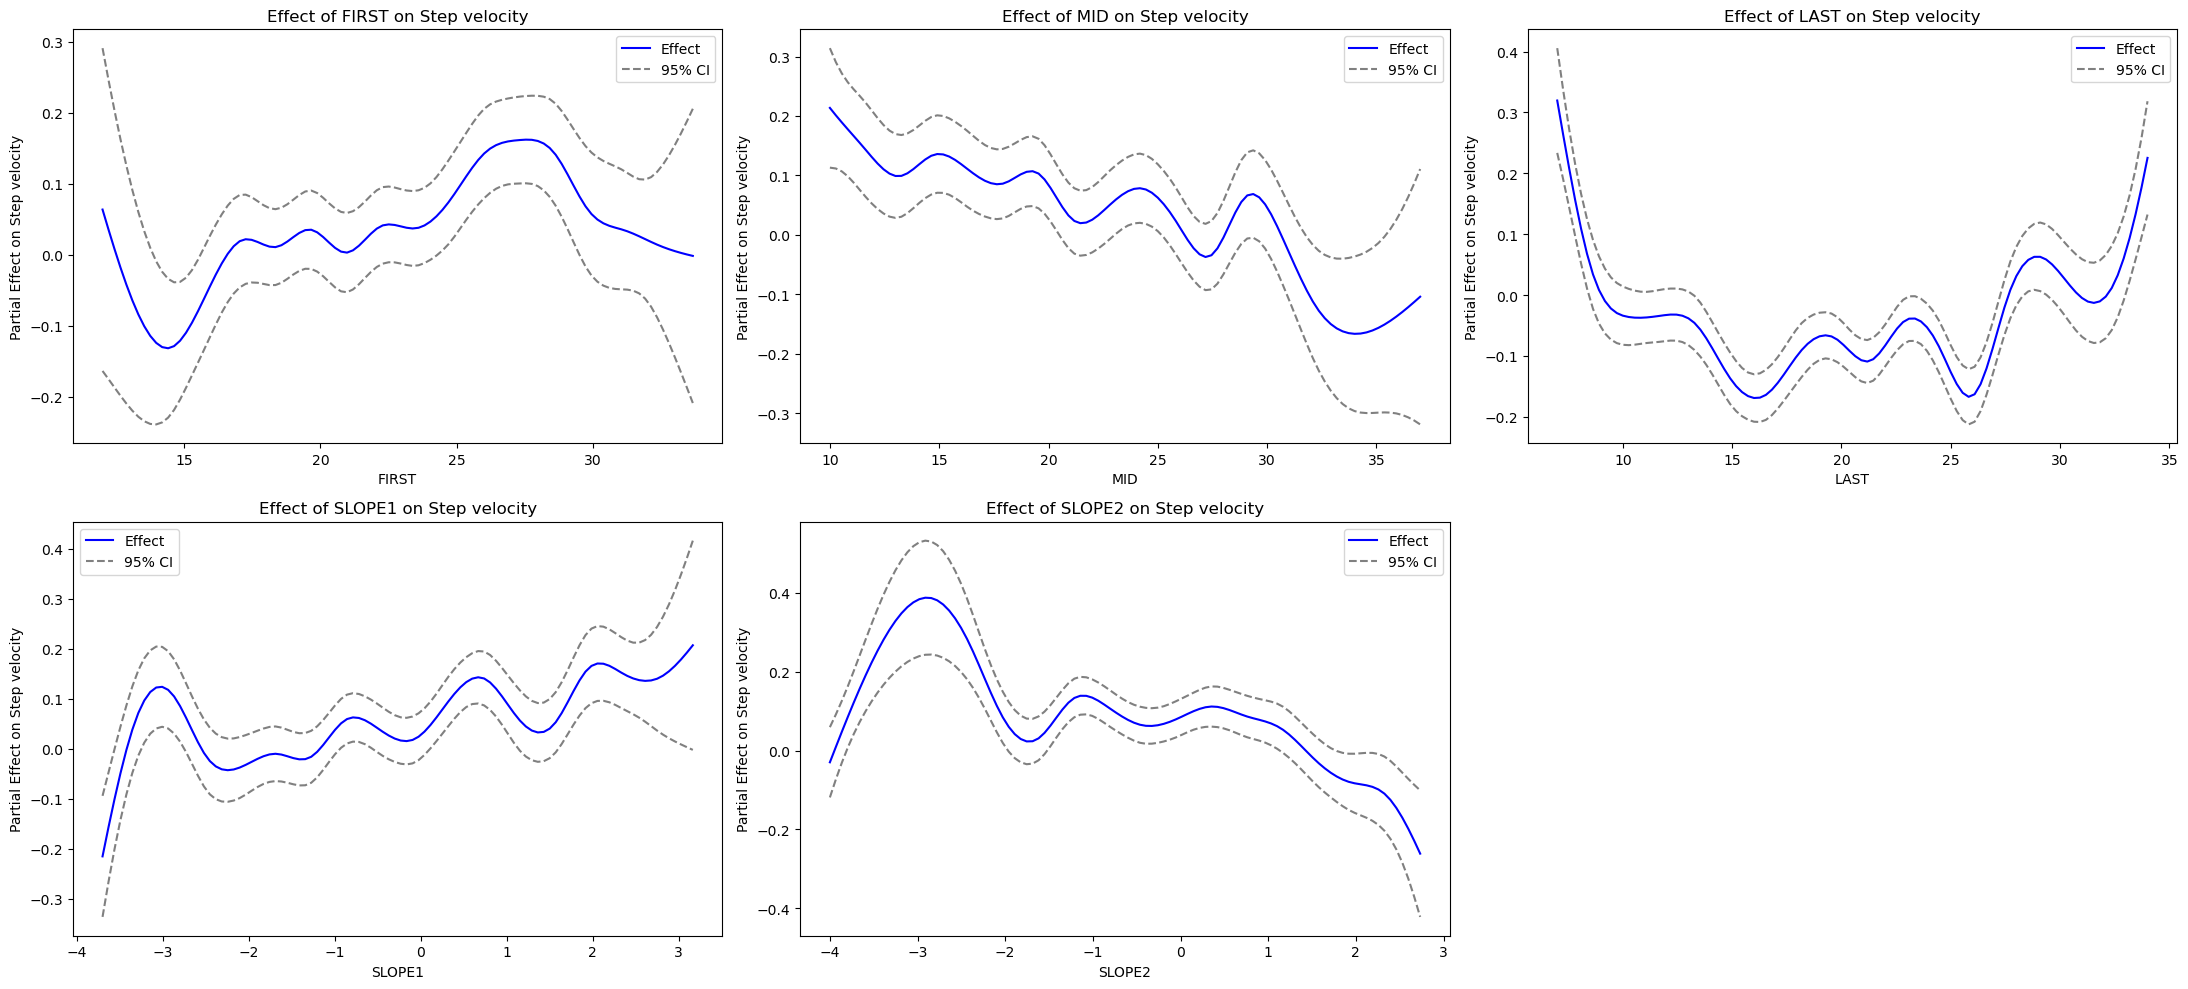

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot area: 2 rows, 3 columns
fig, axs = plt.subplots(2, 3, figsize=(22, 10))  # Bigger plot

titles = ['Effect of FIRST on Step velocity', 'Effect of MID on Step velocity', 'Effect of LAST on Step velocity',
          'Effect of SLOPE1 on Step velocity', 'Effect of SLOPE2 on Step velocity']

# Flatten axes array for easier iteration
axs = axs.flatten()

# Plot smooth terms
for i in range(5):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    axs[i].plot(XX[:, i], pdep, color='blue', label='Effect')
    axs[i].plot(XX[:, i], confi[:, 0], linestyle='--', color='gray', label='95% CI')
    axs[i].plot(XX[:, i], confi[:, 1], linestyle='--', color='gray')

    axs[i].set_title(titles[i])
    axs[i].set_xlabel(titles[i].split(' ')[2])
    axs[i].set_ylabel('Partial Effect on Step velocity')
    axs[i].legend()

# Hide the unused 6th subplot
axs[5].axis('off')

plt.tight_layout()
plt.show()
